<a href="https://colab.research.google.com/github/praveenbejo95/Netflix-Movies-and-TV-shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [45]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [46]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
path = '/content/drive/MyDrive/Colab Notebooks/4th ML(unsupervised) project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [48]:
# Loading the csv File

netflix_df = pd.read_csv(path)
netflix_df.head() #It gives top 5 rows of dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [49]:
#It gives last 5 rows of the dataset
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [50]:
# It gives Total number of rows and columns of dataset
netflix_df.shape

(7787, 12)

In [51]:
#It gives total columns, data types and null count of dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [52]:
# Find the various statistic for all the columns
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


## **Data Cleaning**

**Why do we need to handle missing values?**

* **The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first.**

In [53]:
#Let's count how many missing values we have
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**It shows the number of np.nan or null values or missing values are present in the dataset**

## **Duplicate values**

**Why is it important to remove duplicate records from my data?**

* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**

In [54]:
# Checking Duplicate Values
value=len(netflix_df[netflix_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**It shows that there are no Duplicated Values present in the dataset.**

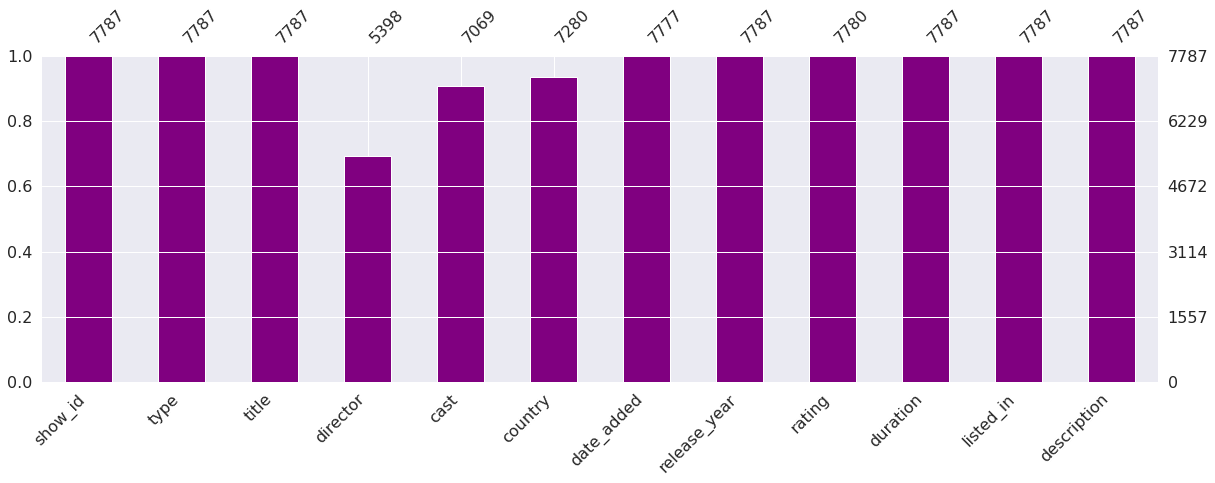

In [55]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.bar(netflix_df,figsize = (20,6),color = 'purple')

In [56]:
# Checking the NAN/Null values in our dataset
for i in netflix_df.columns:
    null_percentage = netflix_df[i].isna().sum() / len(netflix_df) * 100 
    if null_percentage > 0 :
        print("{} column null percentage :{}%".format(i,round(null_percentage,2)))

director column null percentage :30.68%
cast column null percentage :9.22%
country column null percentage :6.51%
date_added column null percentage :0.13%
rating column null percentage :0.09%


**The director column has 30% null values, which is a significantly large proportion. In our analysis, these null values cause certain problems.**

In [57]:
#lets drop director and cast column as this are not too important

netflix_df.drop(['director','cast'], inplace = True, axis = 1)

In [58]:
#lets drop null values in rating and date added as their are very few number of null values

netflix_df.dropna(subset=['rating', 'date_added'],inplace = True)

In [59]:
# Replacing the null values in country column
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Checking the null values are replaced or not
netflix_df['country'].isnull().sum()

0

In [60]:
netflix_df['country'].value_counts() 

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

**As we can see country column has multiple countries in it so we will create a new column containing only one country.** 

In [61]:
netflix_df['prime_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['prime_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: prime_country, dtype: object

## **Let's genereate new columns for our analyis**

In [62]:
netflix_df['year_added'] =netflix_df['date_added'].apply(lambda x: x.split(" ")[-1])

In [63]:
netflix_df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [64]:
netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[0])

In [65]:
netflix_df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [66]:
#lets convert the category accourding to age wise for better understanding and thus making eda more interpretable 

age_wise_rating = {   'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

netflix_df['age_wise_rating'] = netflix_df['rating'].replace(age_wise_rating)
netflix_df['age_wise_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [67]:
netflix_df['age_wise_rating'].value_counts()

Adults          3617
Young Adults    1928
Older Kids      1327
Kids             512
Teens            386
Name: age_wise_rating, dtype: int64

In [68]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          7770 non-null   object
 1   type             7770 non-null   object
 2   title            7770 non-null   object
 3   country          7770 non-null   object
 4   date_added       7770 non-null   object
 5   release_year     7770 non-null   int64 
 6   rating           7770 non-null   object
 7   duration         7770 non-null   object
 8   listed_in        7770 non-null   object
 9   description      7770 non-null   object
 10  prime_country    7770 non-null   object
 11  year_added       7770 non-null   object
 12  month_added      7770 non-null   object
 13  age_wise_rating  7770 non-null   object
dtypes: int64(1), object(13)
memory usage: 910.5+ KB


In [69]:
# lets convert the columns into appropriate data type

netflix_df['type'] = pd.Categorical(netflix_df['type'])

netflix_df['age_wise_rating'] = pd.Categorical(netflix_df['age_wise_rating'], categories=['Kids', 'Older Kids', 'Teens', 'Adults' ])

netflix_df['year_added'] = pd.to_numeric(netflix_df['year_added'])

In [70]:
# Check the variable type if it change or not

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   show_id          7770 non-null   object  
 1   type             7770 non-null   category
 2   title            7770 non-null   object  
 3   country          7770 non-null   object  
 4   date_added       7770 non-null   object  
 5   release_year     7770 non-null   int64   
 6   rating           7770 non-null   object  
 7   duration         7770 non-null   object  
 8   listed_in        7770 non-null   object  
 9   description      7770 non-null   object  
 10  prime_country    7770 non-null   object  
 11  year_added       7770 non-null   int64   
 12  month_added      7770 non-null   object  
 13  age_wise_rating  5842 non-null   category
dtypes: category(2), int64(2), object(10)
memory usage: 804.6+ KB


## **Performing EDA**

## **Analyze the type of content available on Netflix**

In [71]:
netflix_df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

No handles with labels found to put in legend.


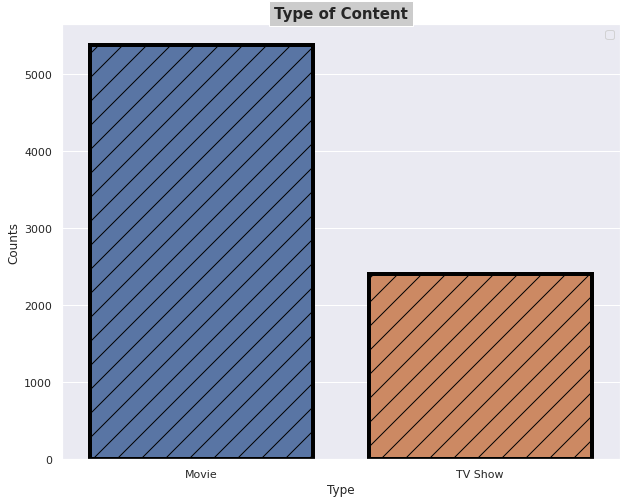

In [72]:
# Plotting the countplot
plt.figure(figsize=(10,8))
ax=sns.countplot('type',data=netflix_df,lw=4, ec='black',
                  hatch='/')
plt.title('Type of Content', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend()

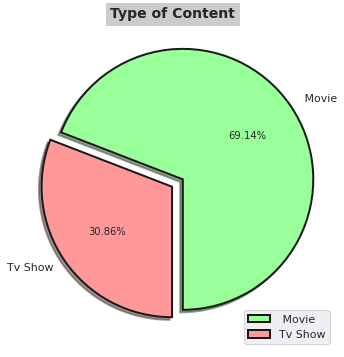

In [73]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = [" Movie",'Tv Show']
values = netflix_df['type'].value_counts().values

# Plotting the graph
myexplode = [0.1, 0]
colors = ['#99ff99', '#ff9999']
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270,
       colors=colors, explode = myexplode, wedgeprops = wedgeprops)

plt.title('Type of Content', bbox={'facecolor':'0.8', 'pad':5},
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

* **It is evident that there are more movies on Netflix than TV shows.**
* **Netflix has 5372 movies, which is more than double the quantity of TV shows.**

## **Movie ratings analysis**

In [74]:
netflix_df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Text(0, 0.5, 'Counts')

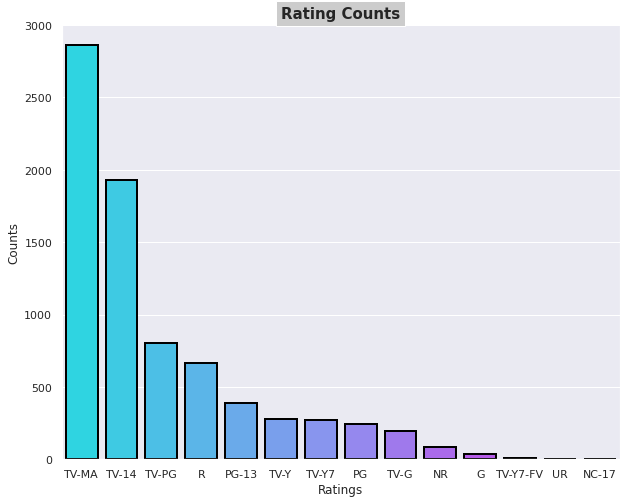

In [75]:
# Plotting the countplot for the ratings
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',palette="cool",
                  order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

Text(0, 0.5, 'Counts')

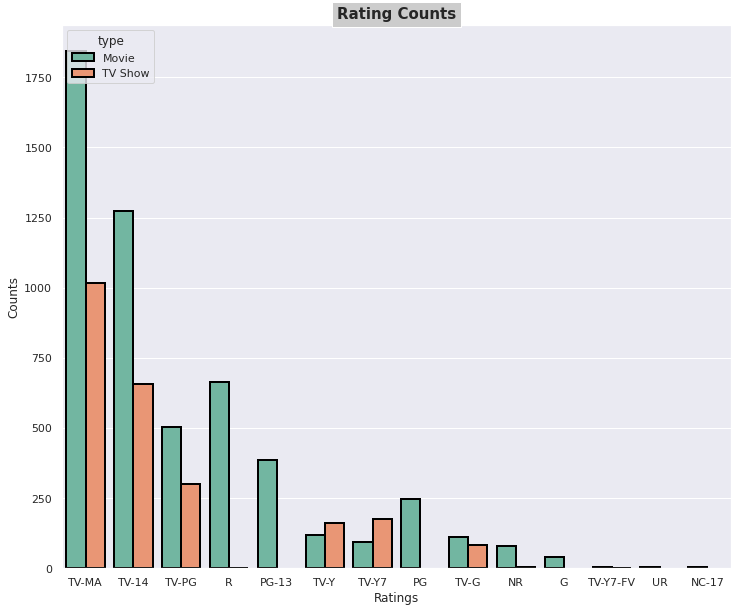

In [76]:
# Plotting the countplot for movie and Tv show ratings
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',hue='type',palette='Set2',
                  order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

* **The 'TV-MA' rating is used in the majority of the film. The TV Parental Guidelines provide a "TV-MA" classification to a television programme that is intended solely for mature audiences.**
* **The second largest is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.**
* **The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian."**

In [77]:
netflix_df['age_wise_rating'].value_counts()

Adults        3617
Older Kids    1327
Kids           512
Teens          386
Name: age_wise_rating, dtype: int64

Text(0, 0.5, 'Counts')

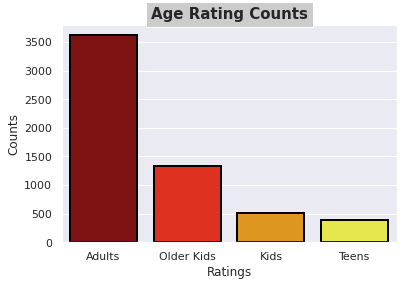

In [79]:
# Countplot for Adult, Teen, Kids, Older Kids
ax=sns.countplot('age_wise_rating',data=netflix_df,lw=2, ec='black',palette='hot',
                  order = netflix_df['age_wise_rating'].value_counts().index)
plt.title('Age Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

* **We can observe from the above count plot that the majority of Netflix material is intended for adults. There is very little content available for teens and kids.**

## **Growth in content over the years**

Text(0.5, 0, 'Added Year')

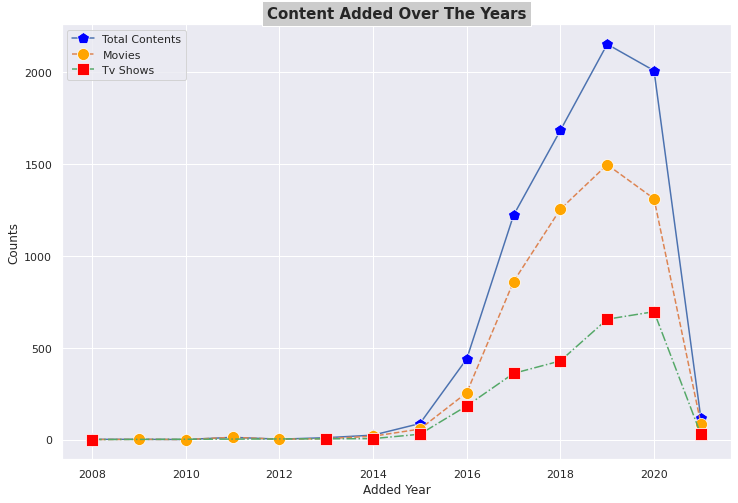

In [88]:
# Plotting the graph for the growth of contents over the netflix
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

tv = df_tv[col].value_counts().reset_index().sort_values('index')
tv = tv.rename(columns = {col : "count", "index" : col})
tv = tv.sort_values(col)

movies = df_movies[col].value_counts().reset_index().sort_values("index")
movies = movies.rename(columns = {col : "count", "index" : col})
movies = movies.sort_values(col)

total = netflix_df[col].value_counts().reset_index().sort_values("index")
total = total.rename(columns = {col : "count", "index" : col})
total = total.sort_values(col)



trace3 = sns.lineplot(x=total[col], y=total["count"], data=netflix_df,linestyle = 
                      'solid', marker = 'p',
         markerfacecolor = 'blue', markersize = 12)
trace2 = sns.lineplot(x=movies[col], y=movies["count"], data=df_movies,linestyle = 
                      'dashed', marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
trace1 = sns.lineplot(x=tv[col], y=tv["count"], data=df_tv,linestyle = 
                      'dashdot', marker = 's',
         markerfacecolor = 'red', markersize = 12)
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.title("Content Added Over The Years",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Added Year')

Text(0.5, 1.0, 'Cumulative')

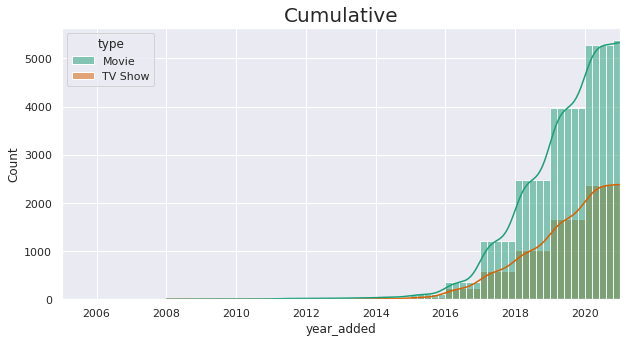

In [90]:
# Cumulative
plt.figure(figsize= (10,5))
ax=sns.histplot(x= netflix_df.year_added, hue= netflix_df.type, kde= True,palette='Dark2', cumulative= True)
plt.xlim(2005,2021)
plt.title("Cumulative", fontsize= 20)

* **The number of movies on Netflix is growing significantly faster than the number of TV shows.**
* **In both 2018 and 2019, approximately 1200 new movies were added.**
* **We saw a huge increase in the number of movies and television episodes after 2014.**
* **Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019.**
* **It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.**

Text(0, 0.5, 'Country Name')

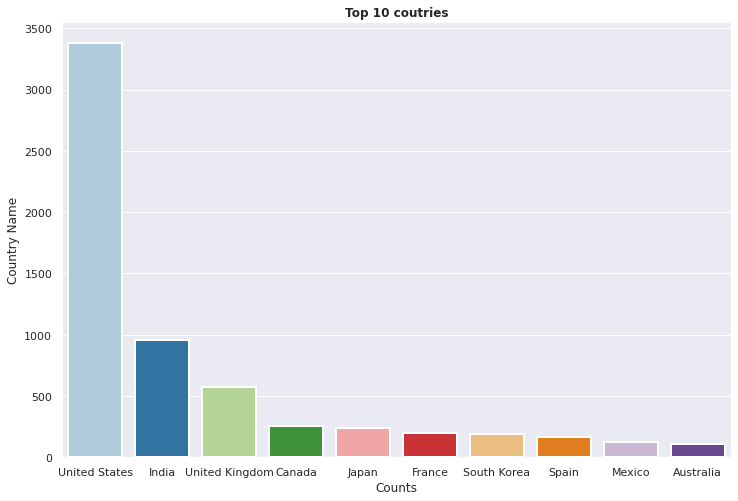

In [91]:
# Top 10 countries on Netflix
plt.figure(figsize=(12,8))
ax=sns.countplot(x='prime_country',lw=2,data=netflix_df,palette='Paired',
              order=netflix_df['prime_country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Counts')
plt.ylabel('Country Name')

**The United States is the most prolific generator of Netflix content, with India and the United Kingdom trailing far behind.**

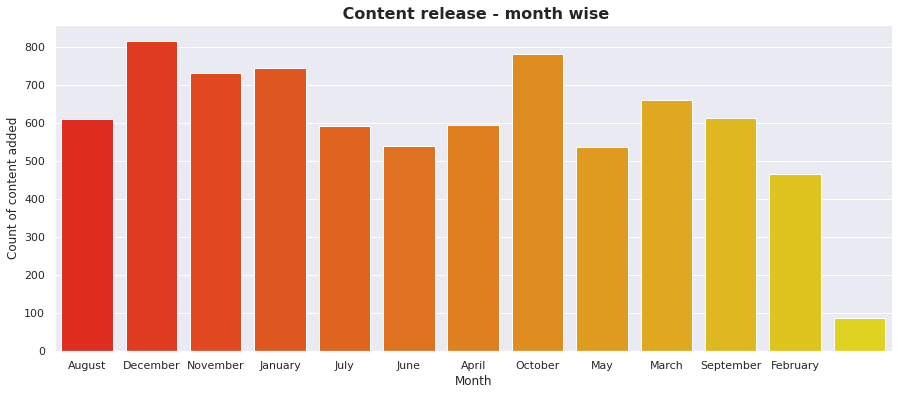

In [92]:
#plot for month wise content release
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=netflix_df,palette='autumn')

plt.title(' Content release - month wise',size='16',fontweight="bold")    
plt.xlabel('Month')
plt.ylabel('Count of content added')
plt.show()

* **The above graph shows that the most content is added to Netflix in December.**
* **In February, Netflix adds extremely few new movies and television episodes.**

Text(0.5, 0, 'Release Year')

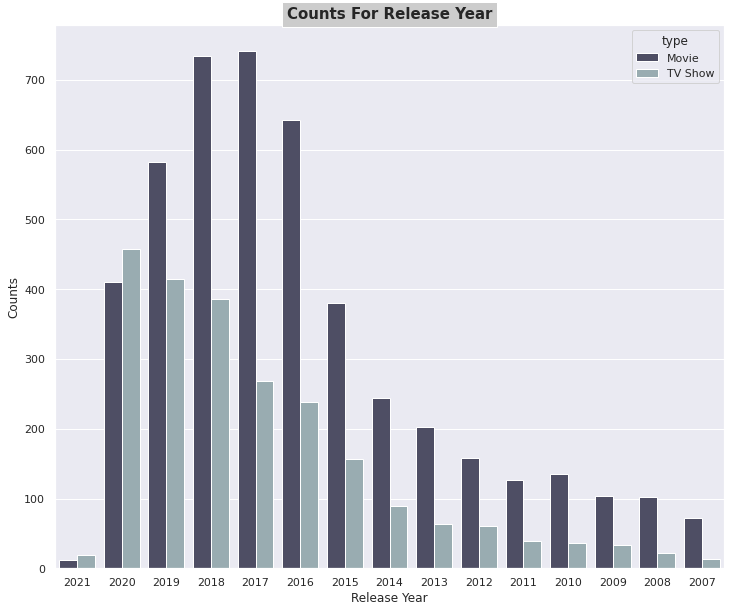

In [93]:
# Plotting the Countplot for release year analysis
plt.figure(figsize=(12,10))
ax=sns.countplot('release_year',data=netflix_df,hue='type',palette='bone',
              order=[2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
                     ,2009,2008,2007])
# We take only those year under consideration, onwards which netflix starts streaming services.

plt.title("Counts For Release Year",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Release Year')

* **According to the following countplot, above 700 movies were released in 2017, which is the most number of releases in any year.**
* **According to the above countplot, there will be above 400 television shows released in 2020, which is the most of any year.**